# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
# from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

        Companies  ESG Score
0    Novo Nordisk         85
1             DSV         81
2          Orsted         76
3       Carlsberg         77
4      Jyske Bank         53
5         Pandora         77
6           Tryg          68
7          Maersk         71
8       Coloplast         75
9     Danske Bank         75
10       Rockwool         69
11         Vestas         73
12  Royal Unibrew         62
13  GN Store Nord         74
14         Demant         56


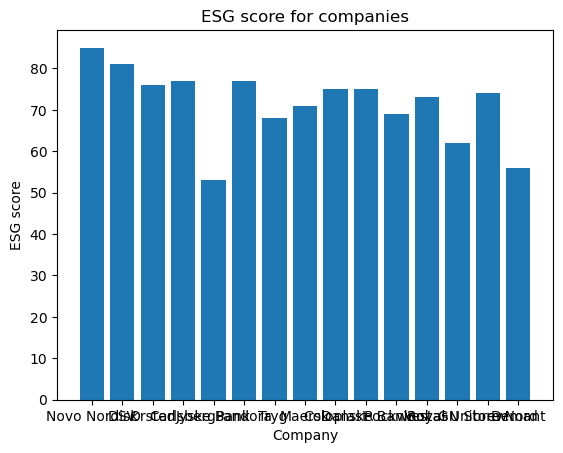

In [79]:
df = pd.read_csv('Companies ESG scores.csv', delimiter=";")
print(df)

plt.bar(df['Companies'], df['ESG Score'])
plt.xlabel('Company')
plt.ylabel('ESG score')
plt.title('ESG score for companies')
plt.show()

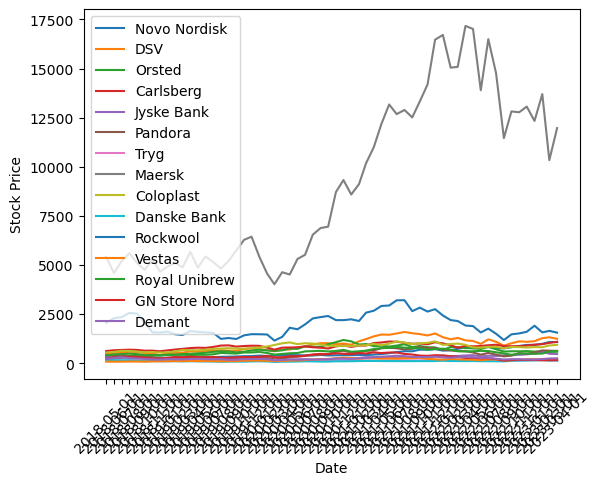

In [80]:
import chardet

# Detect the encoding type of the file
with open('Monthly prices.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
# Read the file using the detected encoding type
df1 = pd.read_csv('Monthly prices.csv', delimiter=';', encoding=result['encoding'])
df1['Date'] = pd.to_datetime(df1['Date'])
df1.columns = df1.columns.str.strip()

# Create figure and axis object
fig, ax = plt.subplots()

# Set x-axis to be the date column
ax.set_xlabel('Date')
ax.set_xticks(df1['Date'].values)
ax.set_xticklabels(df1['Date'].dt.strftime('%Y-%m-%d'), rotation=45)

# Set y-axis to be the stock price column for each company
ax.set_ylabel('Stock Price')
for company in ['Novo Nordisk', 'DSV', 'Orsted', 'Carlsberg', 'Jyske Bank', 'Pandora', 'Tryg', 'Maersk', 'Coloplast', 'Danske Bank', 'Rockwool', 'Vestas', 'Royal Unibrew', 'GN Store Nord', 'Demant']:
    ax.plot(df1['Date'], df1[company], label=company)

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

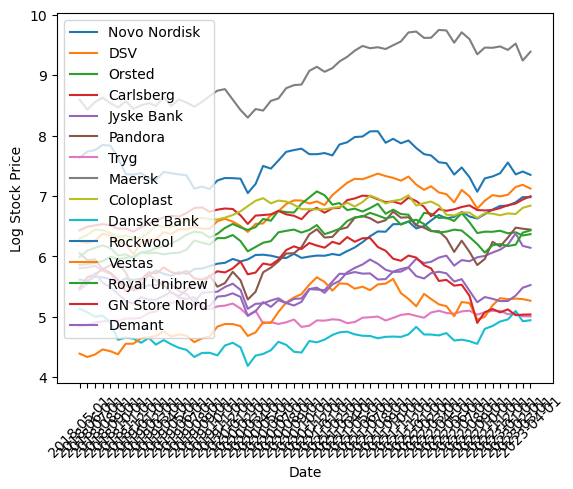

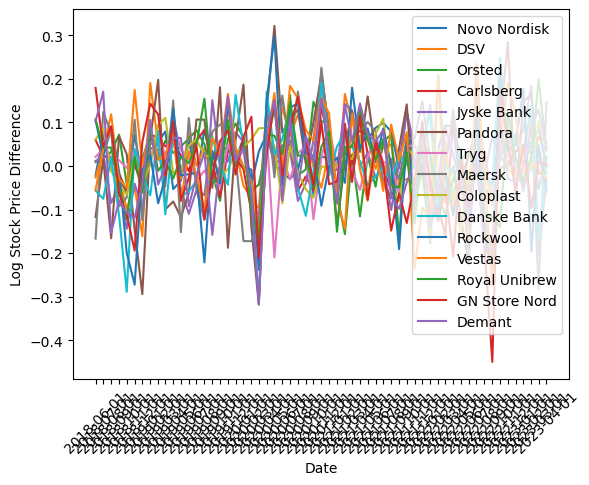

In [87]:
import numpy as np

# Read the data
df1 = pd.read_csv('Monthly prices.csv', delimiter=';')

# Convert date column to pandas datetime type
df1['Date'] = pd.to_datetime(df1['Date'])

# Compute log prices for each company
log_prices = np.log(df1[['Novo Nordisk', 'DSV', 'Orsted', 'Carlsberg', 'Jyske Bank', 'Pandora', 'Tryg', 'Maersk', 'Coloplast', 'Danske Bank', 'Rockwool', 'Vestas', 'Royal Unibrew', 'GN Store Nord', 'Demant']])

# Replace original prices with log prices
df1[['Novo Nordisk', 'DSV', 'Orsted', 'Carlsberg', 'Jyske Bank', 'Pandora', 'Tryg', 'Maersk', 'Coloplast', 'Danske Bank', 'Rockwool', 'Vestas', 'Royal Unibrew', 'GN Store Nord', 'Demant']] = log_prices

# Plot the log prices
fig, ax = plt.subplots()
ax.set_xlabel('Date')
ax.set_xticks(df1['Date'].values)
ax.set_xticklabels(df1['Date'].dt.strftime('%Y-%m-%d'), rotation=45)
ax.set_ylabel('Log Stock Price')
for company in ['Novo Nordisk', 'DSV', 'Orsted', 'Carlsberg', 'Jyske Bank', 'Pandora', 'Tryg', 'Maersk', 'Coloplast', 'Danske Bank', 'Rockwool', 'Vestas', 'Royal Unibrew', 'GN Store Nord', 'Demant']:
    ax.plot(df1['Date'], df1[company], label=company)
ax.legend()
plt.show()

# Read the data
df1 = pd.read_csv('Monthly prices.csv', delimiter=';', parse_dates=['Date'], index_col='Date')

# Compute log prices for each company
log_prices = np.log(df1[['Novo Nordisk', 'DSV', 'Orsted', 'Carlsberg', 'Jyske Bank', 'Pandora', 'Tryg', 'Maersk', 'Coloplast', 'Danske Bank', 'Rockwool', 'Vestas', 'Royal Unibrew', 'GN Store Nord', 'Demant']])

# Compute log difference
log_diff = log_prices.diff().dropna()

# Plot the log difference
fig, ax = plt.subplots()
ax.set_xlabel('Date')
ax.set_xticks(log_diff.index.values)
ax.set_xticklabels(log_diff.index.strftime('%Y-%m-%d'), rotation=45)
ax.set_ylabel('Log Stock Price Difference')
for company in ['Novo Nordisk', 'DSV', 'Orsted', 'Carlsberg', 'Jyske Bank', 'Pandora', 'Tryg', 'Maersk', 'Coloplast', 'Danske Bank', 'Rockwool', 'Vestas', 'Royal Unibrew', 'GN Store Nord', 'Demant']:
    ax.plot(log_diff.index, log_diff[company], label=company)
ax.legend()
plt.show()

In [89]:
# Read the data
df1 = pd.read_csv('Monthly prices.csv', delimiter=';')

# Compute log prices for each company
log_prices = np.log(df1[['Novo Nordisk', 'DSV', 'Orsted', 'Carlsberg', 'Jyske Bank', 'Pandora', 'Tryg', 'Maersk', 'Coloplast', 'Danske Bank', 'Rockwool', 'Vestas', 'Royal Unibrew', 'GN Store Nord', 'Demant']])

# Compute the log diff prices
log_diff_prices = log_prices.diff()

# Compute the average of the log diff prices
avg_log_diff_prices = log_diff_prices.mean()*100

print(avg_log_diff_prices)

Novo Nordisk     2.315210
DSV              1.487937
Orsted           0.860728
Carlsberg        0.955115
Jyske Bank       0.569273
Pandora          0.660972
Tryg             0.275957
Maersk           1.343395
Coloplast        0.923066
Danske Bank     -0.321266
Rockwool        -0.476539
Vestas           1.484826
Royal Unibrew    0.746125
GN Store Nord   -0.742255
Demant           0.134878
dtype: float64


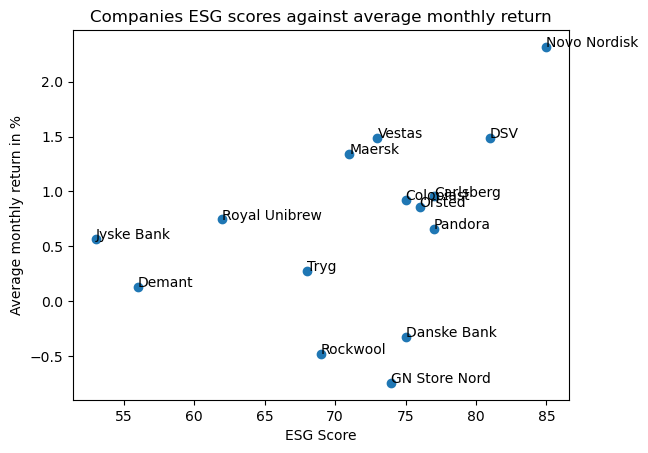

In [90]:
plt.scatter(df['ESG Score'], avg_log_diff_prices)
for i, txt in enumerate(df['Companies']):
    plt.annotate(txt, (df['ESG Score'][i], avg_log_diff_prices[i]))
plt.xlabel('ESG Score')
plt.ylabel('Average monthly return in %')
plt.title('Companies ESG scores against average monthly return')

plt.show()

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [ ]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

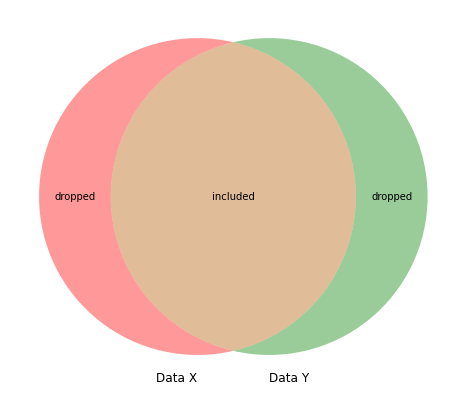

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.